# QMNIST classification and model analysis with confusion matrix

## QMNIST dataset
You are not required but encouraged to read the paper about QMNIST dataset: https://arxiv.org/pdf/1905.10498.pdf

## Outline:

1. Prepare your data

2. Print data

3. Create Linear classifier

4. Create Non-linear classifier

5. Train created models using QMNIST data

6. Visualize learned filters from Linear and Non-linear model

7. Report test accuracy of both models and analyze confusion matrices

## 1. Prepare your data

We have prepared the pickle file which can be downloaded using the link below.

The pickle file is a dict with the keys representing train / test data and labels.

It should be pretty similar to MNIST code we used in the lab.

In [90]:
# downloading code for you
! wget https://nyu.box.com/shared/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl -O ./qmnist.pkl

import pickle

# Class for loading QMNIST data
class QMNIST:
    def __init__(self, path):
        with open('qmnist.pkl', 'rb') as file:
            qmnist = pickle.load(file)
    

        self.train_labels = qmnist['train_labels']
        self.test_labels = qmnist['test_labels']

        self.train_data = qmnist['train_data']
        self.train_data = self.train_data.reshape(self.train_data.shape[0], -1)
        self.test_data = qmnist['test_data']
        self.test_data = self.test_data.reshape(self.test_data.shape[0], -1)

--2020-03-13 23:30:28--  https://nyu.box.com/shared/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl
Resolving nyu.box.com... 107.152.27.197, 107.152.26.197
Connecting to nyu.box.com|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl [following]
--2020-03-13 23:30:28--  https://nyu.box.com/public/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl
Reusing existing connection to nyu.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://nyu.app.box.com/public/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl [following]
--2020-03-13 23:30:28--  https://nyu.app.box.com/public/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl
Resolving nyu.app.box.com... 107.152.26.199, 107.152.27.199
Connecting to nyu.app.box.com|107.152.26.199|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!piaXw4H4eXMnhbCt35lIXya5Xc48B9

In [91]:
# Load data
path = 'qmnist.pkl'
qmnist = QMNIST(path)

In [92]:
# Explore data
qmnist.train_data.shape, qmnist.train_labels.shape

((60000, 784), (60000,))

## 2. Print data

Print five examples from the training part of QMNIST. Feel free to reuse the code from the lab

In [93]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

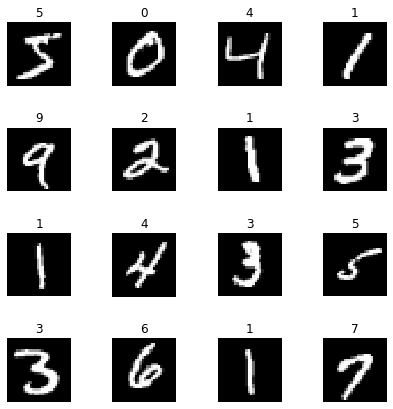

In [94]:
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
fig.tight_layout()

random_idx = np.random.choice(qmnist.train_data.shape[0], size=16, replace=False)

for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        axes[i, j].set_title(qmnist.train_labels[idx])
        axes[i, j].imshow(qmnist.train_data[idx].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')

plt.show()

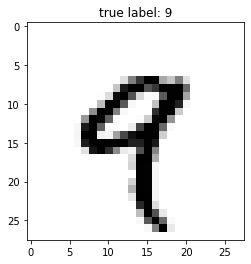

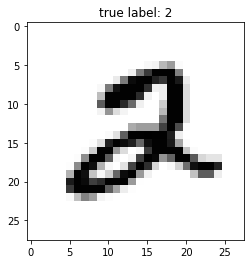

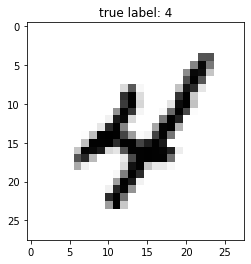

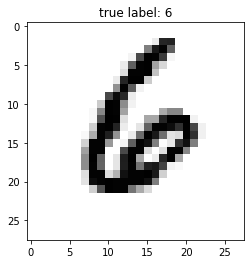

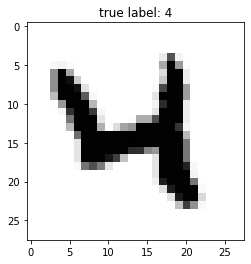

In [95]:
import matplotlib.pyplot as plt

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
    
plot_digit(qmnist.train_data, qmnist.train_labels, 4) 
plot_digit(qmnist.train_data, qmnist.train_labels, 5) 
plot_digit(qmnist.train_data, qmnist.train_labels, 9) 
plot_digit(qmnist.train_data, qmnist.train_labels, 13)
plot_digit(qmnist.train_data, qmnist.train_labels, 20)

## 3. Create *Linear* classfier using sklearn

Create a model with sklearn. It is your task to find out the correct module to use.

**Hint:** google `sklearn softmax classifier` to find out some related references. Do not use svm, try logistic regression.

**Attention:** you must create the multi-class classifier model.

In [96]:
# Load logistic regression model with desired parameters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5,solver = 'lbfgs', multi_class='multinomial', random_state=1)

## 4. Create *Non-linear* classifier using sklearn

Create a model with sklearn. It is your task to find out the correct module to use.

**Hint:** google `sklearn neural network` to find out some related references. Do not use svm, try neural network. Use any reasonable hyper-parameter for hidden size and number of layers to keep it running fast enough on your laptop etc.



In [97]:

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100,100, 100), random_state=1)

## 5. Train created models using QMNIST data

Train your model using `.fit()` function.

**Attention:** to get full points you need to get `>90%` accuracy on 50k test set.

Make sure that accuracy value is saved in the output of the cell.

In [98]:
logreg.fit(qmnist.train_data, qmnist.train_labels)

score_train_logreg = logreg.score(qmnist.train_data, qmnist.train_labels)
print("Accuracy on the training set:", score_train_logreg)
print("Error rate on the training set:", 1 - score_train_logreg)

score_test_logreg = logreg.score(qmnist.test_data, qmnist.test_labels)
print("Accuracy on the test set:", score_test_logreg)
print("Error rate on the test set:", 1 - score_test_logreg)

/Users/hyeongjihyeon/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy on the training set: 0.9340166666666667
Error rate on the training set: 0.06598333333333328
Accuracy on the test set: 0.9194
Error rate on the test set: 0.0806


In [99]:
mlp.fit(qmnist.train_data, qmnist.train_labels)

score_train_mlp = mlp.score(qmnist.train_data, qmnist.train_labels)
print("Accuracy on the training set:", score_train_mlp)
print("Error rate on the training set:", 1 - score_train_mlp)

score_test_mlp = mlp.score(qmnist.test_data, qmnist.test_labels)
print("Accuracy on the test set:", score_test_mlp)
print("Error rate on the test set:", 1 - score_test_mlp)

Accuracy on the training set: 0.9962666666666666
Error rate on the training set: 0.0037333333333333663
Accuracy on the test set: 0.96914
Error rate on the test set: 0.03086


## 6. Visualize learned filters from Linear and Non-linear model

Visualize filters (learned weights) similar to what you saw in lab. Sklearn docs have some examples of doing this for non-linear model. For non-linear model you can represent some rows from the first layer of the neural network (since there are more than 10 of such rows, you can use first 10 rows).

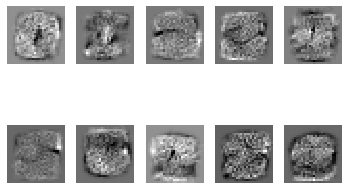

In [100]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        idx = j + i * 5
        axes[i, j].imshow(logreg.coef_[idx, ].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')

plt.show()

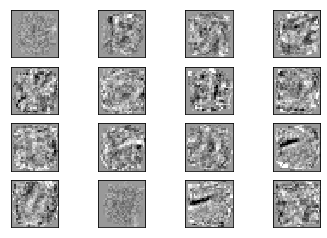

In [101]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4)

vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Visualizing the learned filter gives so much interesting!! This blurred and hard-to-identify image actually works for an accurate classification with such a high accuracy of 96%! I guess the reason of this appearance is the hidden layer is just a process in-between convergence so it's basically remained a kind of noise.

## 7. Report test accuracy of both models and analyze confusion matrices

Get the accuracy using `.score()` function (**using test data**).

**Attention:** to get full points:

1. You need to get *`>90%`* accuracy on 50k test set. 
2. Non-linear model should give better performance (think why).

Make sure that accuracy value **is saved in the output** of the cell.

For confusion matrix, use `sklearn.metrics.confusion_matrix`

Firstly, compute confusion matrix using your model and test data.

Then, given the defition:
```
By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
```

Estimate what is the most confusing pair (i -> j) of classes for you model (write code for that!).

You will notice that confusing pair usually has similar digits '' on average '' e.g. 1 and 7 or 7 and 9

## Answer to the question 
Interestingly, the non-linear model is more accurate than the linear model! It seems that in such a high dimensional case, the non-linear model can perform better than the linear model. 
Also, from the confusion matrix, the most confusing pair is 3 -> 4, which implies that the machine finds distinguishing the digit 3 from the digit 4 to be most difficult so as to misclassify the digit 3 to digit 4.

In [102]:
score_test_logreg = logreg.score(qmnist.test_data, qmnist.test_labels)
print("Accuracy on the test set:", score_test_logreg)
print("Error rate on the test set:", 1 - score_test_logreg)

Accuracy on the test set: 0.9194
Error rate on the test set: 0.0806


In [103]:
score_test_mlp = mlp.score(qmnist.test_data, qmnist.test_labels)
print("Accuracy on the test set:", score_test_mlp)
print("Error rate on the test set:", 1 - score_test_mlp)

Accuracy on the test set: 0.96914
Error rate on the test set: 0.03086


## Confusion Matrix

In [104]:
from sklearn.metrics import confusion_matrix

y_pred = mlp.predict(qmnist.test_data) 
confusion_mlp = confusion_matrix(qmnist.test_labels, y_pred)

print(confusion_mlp)

[[4885    1    5    7    2   18   26    0   15   13]
 [   2 5588   13    8    0   10    9    7   11    8]
 [   9    9 4745  100   11    3    9   25   77    6]
 [   3    4   19 4928    2   64    1    7   30   16]
 [   7   14    9    2 4633    2   15   17    4   95]
 [  12    7    3   53    0 4405   21    1   36   24]
 [  24    7    9    1   10   32 4883    0   30    3]
 [  10   23   27   27   19    3    0 5002    9   83]
 [  21   28    8   24   11   50   13    7 4714   40]
 [  18    5    1   19   36   16    1   17   39 4674]]


In [105]:
recall = np.zeros((10,10))

for i in range(10):
    total = sum(confusion_mlp[i,:])
    for j in range(10):
        recall[i,j] = confusion_mlp[i,j] / total

print(recall)


[[9.82502011e-01 2.01126307e-04 1.00563154e-03 1.40788415e-03
  4.02252615e-04 3.62027353e-03 5.22928399e-03 0.00000000e+00
  3.01689461e-03 2.61464200e-03]
 [3.53606789e-04 9.87977369e-01 2.29844413e-03 1.41442716e-03
  0.00000000e+00 1.76803395e-03 1.59123055e-03 1.23762376e-03
  1.94483734e-03 1.41442716e-03]
 [1.80216260e-03 1.80216260e-03 9.50140168e-01 2.00240288e-02
  2.20264317e-03 6.00720865e-04 1.80216260e-03 5.00600721e-03
  1.54185022e-02 1.20144173e-03]
 [5.91249507e-04 7.88332676e-04 3.74458021e-03 9.71225857e-01
  3.94166338e-04 1.26133228e-02 1.97083169e-04 1.37958218e-03
  5.91249507e-03 3.15333071e-03]
 [1.45894123e-03 2.91788245e-03 1.87578158e-03 4.16840350e-04
  9.65610671e-01 4.16840350e-04 3.12630263e-03 3.54314298e-03
  8.33680700e-04 1.97999166e-02]
 [2.63042525e-03 1.53441473e-03 6.57606313e-04 1.16177115e-02
  0.00000000e+00 9.65585270e-01 4.60324419e-03 2.19202104e-04
  7.89127576e-03 5.26085050e-03]
 [4.80096019e-03 1.40028006e-03 1.80036007e-03 2.00040008e

# BONUS 2 points

Train Non-linear model with a different initialization (make sure that random seed is different) and compare the most confusing pair with the first trained model. Is it different? Provide some argument why it can be different.

When I train my non-linear model with a different initialization, now it turns out that the most confusing pair is 10 -> 5, which is different from the previous model result, which was 3 -> 4. It seems because the non-linear model takes a layered structure, so depending on the initial point, each layers is trained with a different speed. Or, another guess is depending on the initial point, the model starts to find the gradient of that local area.

In [106]:
mlp2 = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100,100, 100), random_state=10)

mlp2.fit(qmnist.train_data, qmnist.train_labels)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [107]:
y_pred2 = mlp2.predict(qmnist.test_data) 
confusion_mlp2 = confusion_matrix(qmnist.test_labels, y_pred2)

print(confusion_mlp2)

[[4886    0    5    7    3    7   35    4    3   22]
 [   2 5599    6    6   16    8   11    5    2    1]
 [  21   16 4718   94   33    8   30   30   35    9]
 [   7    5   20 4946    2   37    5    8   24   20]
 [   5    3    0    1 4706    1   24   17    8   33]
 [  19    2    2   75    3 4377   40    3   25   16]
 [  31    3    2    2    6   27 4927    0    1    0]
 [   8   22   16   22   32    8    2 5030    7   56]
 [  20   31   12   72   18   50   65    6 4597   45]
 [  13    6    1   21  106   21    3   46   25 4584]]


In [108]:
recall = np.zeros((10,10))

for i in range(10):
    total = sum(confusion_mlp2[i,:])
    for j in range(10):
        recall[i,j] = confusion_mlp2[i,j] / total

print(recall)


[[9.82703138e-01 0.00000000e+00 1.00563154e-03 1.40788415e-03
  6.03378922e-04 1.40788415e-03 7.03942076e-03 8.04505229e-04
  6.03378922e-04 4.42477876e-03]
 [3.53606789e-04 9.89922207e-01 1.06082037e-03 1.06082037e-03
  2.82885431e-03 1.41442716e-03 1.94483734e-03 8.84016973e-04
  3.53606789e-04 1.76803395e-04]
 [4.20504606e-03 3.20384461e-03 9.44733680e-01 1.88225871e-02
  6.60792952e-03 1.60192231e-03 6.00720865e-03 6.00720865e-03
  7.00841009e-03 1.80216260e-03]
 [1.37958218e-03 9.85415845e-04 3.94166338e-03 9.74773354e-01
  3.94166338e-04 7.29207726e-03 9.85415845e-04 1.57666535e-03
  4.72999606e-03 3.94166338e-03]
 [1.04210088e-03 6.25260525e-04 0.00000000e+00 2.08420175e-04
  9.80825344e-01 2.08420175e-04 5.00208420e-03 3.54314298e-03
  1.66736140e-03 6.87786578e-03]
 [4.16483998e-03 4.38404209e-04 4.38404209e-04 1.64401578e-02
  6.57606313e-04 9.59447611e-01 8.76808417e-03 6.57606313e-04
  5.48005261e-03 3.50723367e-03]
 [6.20124025e-03 6.00120024e-04 4.00080016e-04 4.00080016e

# THE END

plese carefully check that all numbers / pics you produced are saved.